## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path('Resources/bitstamp.csv'), index_col = "Timestamp", parse_dates = True, infer_datetime_format = True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase =pd.read_csv(Path('Resources/coinbase.csv'), index_col = "Timestamp", parse_dates = True, infer_datetime_format = True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
print(bitstamp.loc[:, "Close"])
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

Timestamp
2018-01-01 00:00:00    $13646.48
2018-01-01 00:01:00    $13658.75
2018-01-01 00:02:00    $13610.22
2018-01-01 00:03:00    $13639.09
2018-01-01 00:04:00     $13620.0
                         ...    
2018-03-31 23:55:00     $6922.56
2018-03-31 23:56:00     $6920.32
2018-03-31 23:57:00     $6934.72
2018-03-31 23:58:00     $6927.65
2018-03-31 23:59:00     $6928.01
Name: Close, Length: 129540, dtype: object


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.drop_duplicates

<bound method DataFrame.drop_duplicates of                          Open      High       Low     Close  BTC Volume  \
Timestamp                                                                 
2018-01-01 00:00:00  13681.04  13681.04  13637.93  13646.48    3.334553   
2018-01-01 00:01:00  13646.48  13658.75  13610.18  13658.75    2.663188   
2018-01-01 00:02:00  13616.93  13616.93  13610.06  13610.22    0.084653   
2018-01-01 00:03:00  13610.27  13639.09  13610.27  13639.09    7.182986   
2018-01-01 00:04:00  13635.35  13636.35  13620.00  13620.00    1.069665   
...                       ...       ...       ...       ...         ...   
2018-03-31 23:55:00   6935.01   6939.07   6922.56   6922.56    1.044354   
2018-03-31 23:56:00   6922.02   6922.02   6918.00   6920.32    3.069539   
2018-03-31 23:57:00   6920.33   6936.42   6920.33   6934.72   28.239049   
2018-03-31 23:58:00   6927.65   6929.42   6927.65   6927.65    0.839507   
2018-03-31 23:59:00   6929.98   6929.98   6928.00   6928.

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.dropna()
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.drop_duplicates

<bound method DataFrame.drop_duplicates of                          Open      High       Low     Close  BTC Volume  \
Timestamp                                                                 
2018-01-01 00:00:00  13620.00  13620.00  13608.49  13608.49   20.812754   
2018-01-01 00:01:00  13607.14  13607.14  13601.66  13601.66   13.474359   
2018-01-01 00:02:00  13601.44  13601.44  13580.00  13580.00   11.536360   
2018-01-01 00:03:00  13587.31  13587.31  13542.70  13550.34   16.328039   
2018-01-01 00:04:00  13550.34  13585.95  13550.34  13583.44    9.955364   
...                       ...       ...       ...       ...         ...   
2018-03-31 23:55:00   6945.20   6948.06   6930.00   6930.00    5.802288   
2018-03-31 23:56:00   6930.00   6930.01   6930.00   6930.01    0.625053   
2018-03-31 23:57:00   6930.01   6933.91   6930.01   6933.91    0.776431   
2018-03-31 23:58:00   6933.91   6938.00   6933.90   6937.31    0.133413   
2018-03-31 23:59:00   6937.30   6937.30   6931.09   6934.

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced =bitstamp.loc[:, "Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head(5)

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head(5)

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

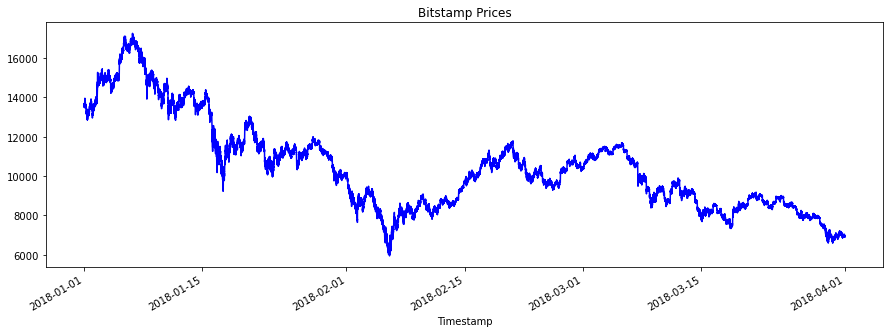

In [15]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(15, 5), title="Bitstamp Prices", color="blue", label="bitstamp closing")

<AxesSubplot:title={'center':'Coinbase Pricing'}, xlabel='Timestamp'>

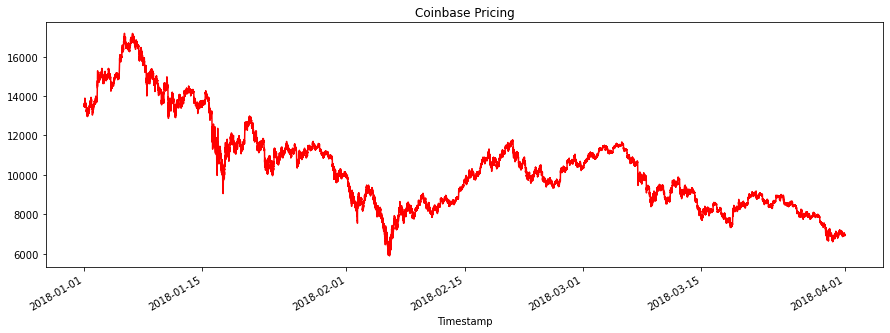

In [16]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(15, 5), title="Coinbase Pricing", color="red", label="coinbase closing")

<AxesSubplot:title={'center':'Coinbase Pricing'}, xlabel='Timestamp'>

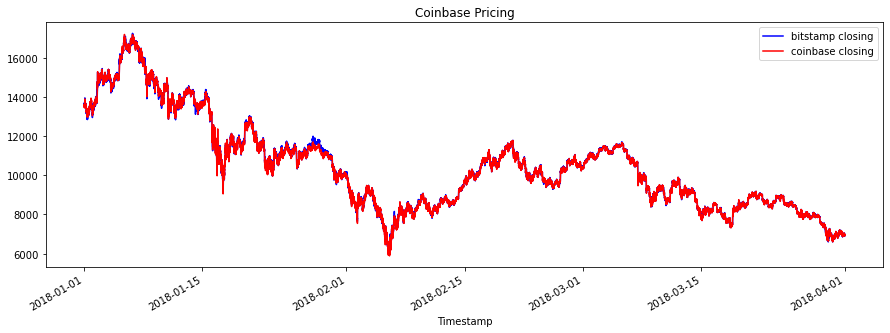

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend = True,figsize=(15, 5), title="Bitstamp Prices", color="blue", label="bitstamp closing")
coinbase_sliced.plot(legend = True, figsize=(15, 5), title="Coinbase Pricing", color="red", label="coinbase closing")

<AxesSubplot:title={'center':'2018 Jan Coinbase Prices'}, xlabel='Timestamp'>

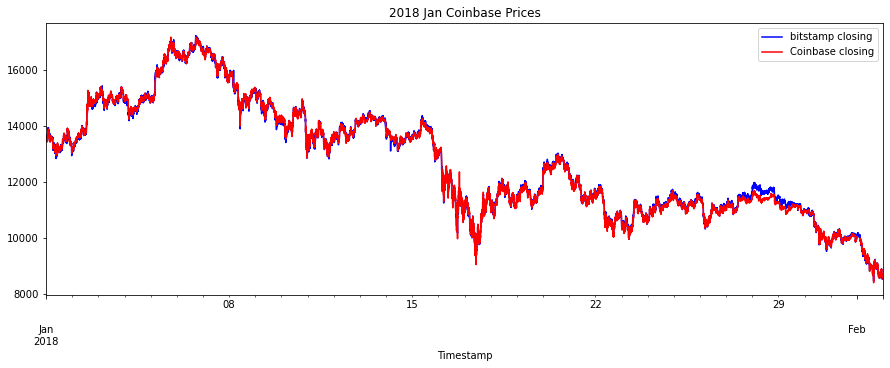

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_early_one_month_data = bitstamp_sliced.loc['2018-01-01': '2018-02-01']
bitstamp_early_one_month_data.plot(legend = True,figsize=(15, 5), title="2018 Jan Bitstamp Prices", color="blue", label="bitstamp closing")
coinbase_early_one_month_data = coinbase_sliced.loc['2018-01-01': '2018-02-01']
coinbase_early_one_month_data.plot(legend = True,figsize=(15, 5), title="2018 Jan Coinbase Prices", color="red", label="Coinbase closing")


<AxesSubplot:title={'center':'2018 March Coinbase Prices'}, xlabel='Timestamp'>

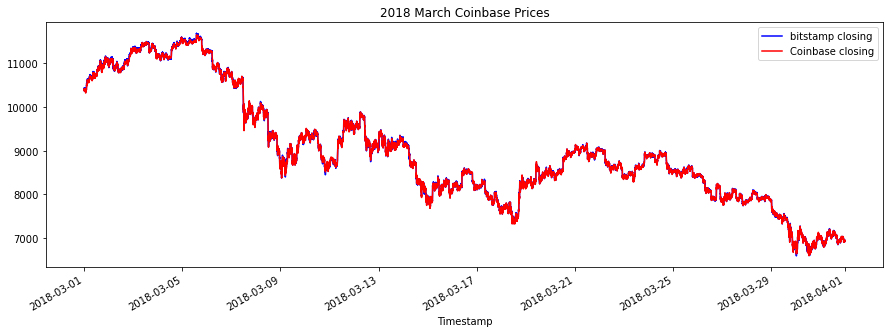

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_later_one_month_data = bitstamp_sliced.loc['2018-03-01': '2018-03-31']
bitstamp_later_one_month_data.plot(legend = True,figsize=(15, 5), title="2018 March Bitstamp Prices", color="blue", label="bitstamp closing")
coinbase_later_one_month_data = coinbase_sliced.loc['2018-03-01': '2018-03-31']
coinbase_later_one_month_data.plot(legend = True,figsize=(15, 5), title="2018 March Coinbase Prices", color="red", label="Coinbase closing")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Looks like there has been arbitrage opportunities at the beginning of 2018. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

Timestamp
2018-01-14 00:00:00    13871.89
2018-01-14 00:01:00    13900.00
2018-01-14 00:02:00    13895.11
2018-01-14 00:03:00    13902.94
2018-01-14 00:04:00    13959.11
                         ...   
2018-01-14 23:55:00    13638.23
2018-01-14 23:56:00    13650.00
2018-01-14 23:57:00    13639.80
2018-01-14 23:58:00    13639.80
2018-01-14 23:59:00    13639.80
Name: Close, Length: 1440, dtype: float64

Timestamp
2018-01-14 00:00:00    13866.56
2018-01-14 00:01:00    13874.27
2018-01-14 00:02:00    13905.00
2018-01-14 00:03:00    13905.00
2018-01-14 00:04:00    13925.79
                         ...   
2018-01-14 23:55:00    13615.30
2018-01-14 23:56:00    13620.00
2018-01-14 23:57:00    13619.56
2018-01-14 23:58:00    13620.01
2018-01-14 23:59:00    13620.01
Name: Close, Length: 1440, dtype: float64

<AxesSubplot:title={'center':'2018 Jan 14  Coinbase Prices'}, xlabel='Timestamp'>

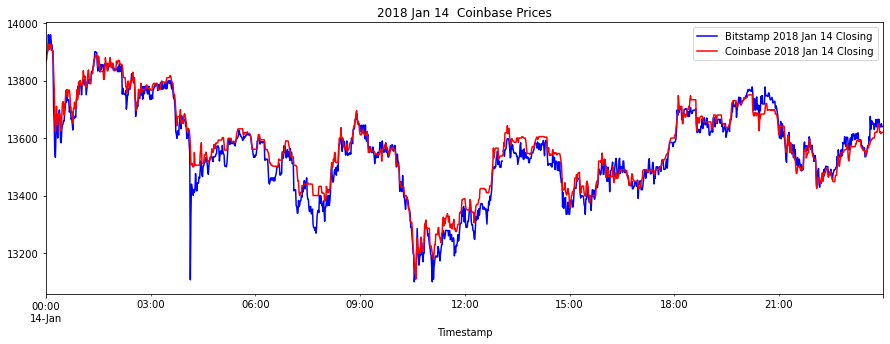

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_jan_14 = bitstamp_sliced.loc['2018-01-14']
display(bitstamp_jan_14)
bitstamp_jan_14.plot(legend = True,figsize=(15, 5), title="2018 Jan 14 Bitstamp Prices", color="blue", label="Bitstamp 2018 Jan 14 Closing")
coinbase_jan_14 = coinbase_sliced.loc['2018-01-14']
display(coinbase_jan_14)
coinbase_jan_14.plot(legend = True,figsize=(15, 5), title="2018 Jan 14  Coinbase Prices", color="red", label="Coinbase 2018 Jan 14 Closing")

In [21]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_jan_14 - bitstamp_jan_14
display(arbitrage_spread_early)
# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

Timestamp
2018-01-14 00:00:00    -5.33
2018-01-14 00:01:00   -25.73
2018-01-14 00:02:00     9.89
2018-01-14 00:03:00     2.06
2018-01-14 00:04:00   -33.32
                       ...  
2018-01-14 23:55:00   -22.93
2018-01-14 23:56:00   -30.00
2018-01-14 23:57:00   -20.24
2018-01-14 23:58:00   -19.79
2018-01-14 23:59:00   -19.79
Name: Close, Length: 1440, dtype: float64

count    1439.000000
mean       16.685274
std        34.341516
min       -89.260000
25%        -4.995000
50%        14.980000
75%        35.975000
max       468.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage spread early'}>

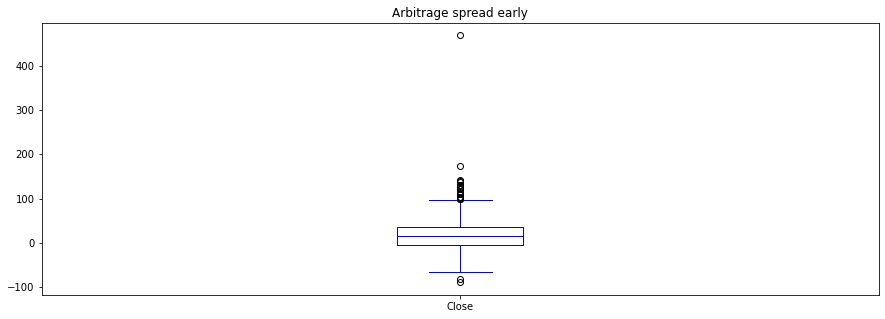

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind = 'box',figsize=(15, 5), title="Arbitrage spread early", color="blue")

Timestamp
2018-02-20 00:00:00    11450.00
2018-02-20 00:01:00    11450.26
2018-02-20 00:02:00    11450.79
2018-02-20 00:03:00    11437.79
2018-02-20 00:04:00    11449.47
                         ...   
2018-02-20 23:55:00    10831.23
2018-02-20 23:56:00    10810.01
2018-02-20 23:57:00    10810.00
2018-02-20 23:58:00    10782.20
2018-02-20 23:59:00    10790.77
Name: Close, Length: 1440, dtype: float64

<AxesSubplot:title={'center':'2018 Feb 20  Coinbase Prices'}, xlabel='Timestamp'>

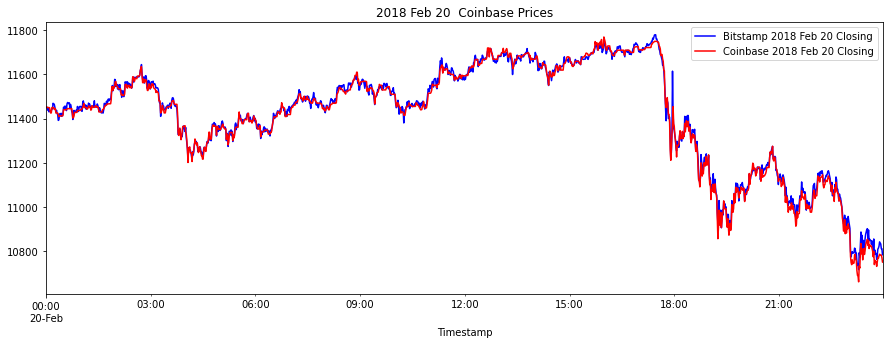

In [50]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_Feb_20 = bitstamp_sliced.loc['2018-02-20']
display(bitstamp_Feb_20)
bitstamp_Feb_20.plot(legend = True,figsize=(15, 5), title="2018 Feb 20 Bitstamp Prices", color="blue", label="Bitstamp 2018 Feb 20 Closing")
coinbase_Feb_20 = coinbase_sliced.loc['2018-02-20']
coinbase_Feb_20.plot(legend = True,figsize=(15, 5), title="2018 Feb 20  Coinbase Prices", color="red", label="Coinbase 2018 Feb 20 Closing")

In [51]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_Feb_20 - coinbase_Feb_20
# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1439.000000
mean        7.038860
std        17.337259
min       -59.940000
25%        -3.960000
50%         5.910000
75%        16.825000
max       254.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage spread middle'}>

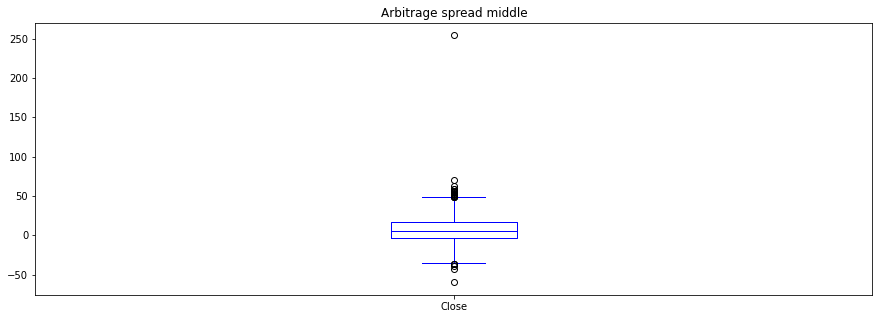

In [52]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind = 'box',figsize=(15, 5), title="Arbitrage spread middle", color="blue")



Timestamp
2018-03-28 00:00:00    7850.05
2018-03-28 00:01:00    7852.00
2018-03-28 00:02:00    7851.98
2018-03-28 00:03:00    7853.99
2018-03-28 00:04:00    7860.00
                        ...   
2018-03-28 23:55:00    7870.93
2018-03-28 23:56:00    7871.60
2018-03-28 23:57:00    7870.81
2018-03-28 23:58:00    7876.94
2018-03-28 23:59:00    7866.63
Name: Close, Length: 1440, dtype: float64

Timestamp
2018-03-28 00:00:00    7860.00
2018-03-28 00:01:00    7859.01
2018-03-28 00:02:00    7853.90
2018-03-28 00:03:00    7845.19
2018-03-28 00:04:00    7853.89
                        ...   
2018-03-28 23:55:00    7869.32
2018-03-28 23:56:00    7870.00
2018-03-28 23:57:00    7870.00
2018-03-28 23:58:00    7869.99
2018-03-28 23:59:00    7870.00
Name: Close, Length: 1440, dtype: float64

<AxesSubplot:title={'center':'2018 Mar 28  Coinbase Prices'}, xlabel='Timestamp'>

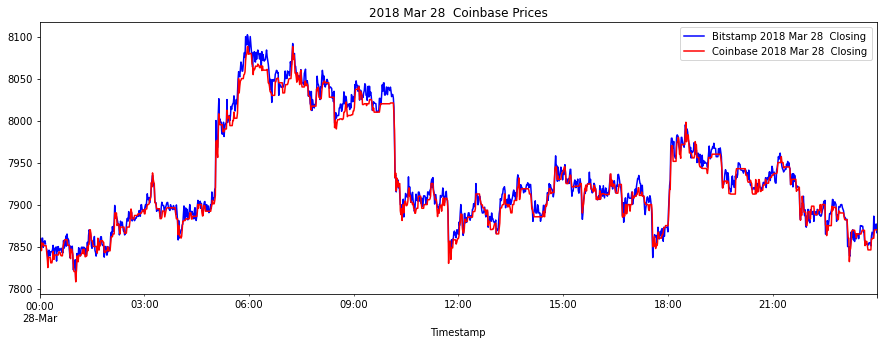

In [53]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_Mar_28 = bitstamp_sliced.loc['2018-03-28']
display(bitstamp_Mar_28)
bitstamp_Mar_28.plot(legend = True,figsize=(15, 5), title="2018 Mar 28 Bitstamp Prices", color="blue", label="Bitstamp 2018 Mar 28  Closing")
coinbase_Mar_28 = coinbase_sliced.loc['2018-03-28']
display(coinbase_Mar_28)
coinbase_Mar_28.plot(legend = True,figsize=(15, 5), title="2018 Mar 28  Coinbase Prices", color="red", label="Coinbase 2018 Mar 28  Closing")

In [57]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late =  bitstamp_Mar_28 - coinbase_Mar_28

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1438.00000
mean        4.42427
std         7.44509
min       -26.30000
25%        -0.48000
50%         4.53500
75%         8.99000
max        28.73000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage spread late'}>

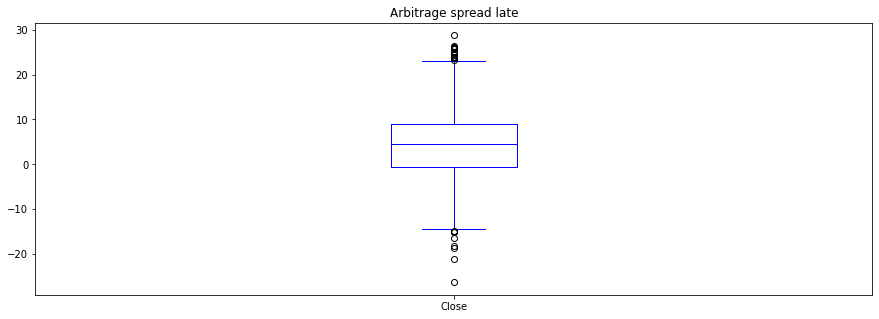

In [58]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind = 'box',figsize=(15, 5), title="Arbitrage spread late", color="blue")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [76]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_jan_14 - bitstamp_jan_14 
arbitrage_spread_middle =    bitstamp_Feb_20- coinbase_Feb_20
arbitrage_spread_late =     bitstamp_Mar_28 - coinbase_Mar_28 
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early>0].describe()


count    1001.000000
mean       32.275974
std        28.313976
min         0.010000
25%        13.420000
50%        26.770000
75%        45.080000
max       468.000000
Name: Close, dtype: float64

In [66]:
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()


count    938.000000
mean      15.870704
std       14.226324
min        0.010000
25%        6.307500
50%       13.690000
75%       20.947500
max      254.000000
Name: Close, dtype: float64

In [77]:
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    1028.000000
mean        7.853317
std         5.521699
min         0.010000
25%         3.710000
50%         6.880000
75%        10.712500
max        28.730000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [72]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_jan_14

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-14 00:00:00         NaN
2018-01-14 00:01:00         NaN
2018-01-14 00:02:00    0.000712
2018-01-14 00:03:00    0.000148
2018-01-14 00:04:00         NaN
                         ...   
2018-01-14 23:55:00         NaN
2018-01-14 23:56:00         NaN
2018-01-14 23:57:00         NaN
2018-01-14 23:58:00         NaN
2018-01-14 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64

In [78]:
# For the date  in the middle of the  dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase_Feb_20

# Review the spread return DataFrame
spread_return_middle



Timestamp
2018-02-20 00:00:00         NaN
2018-02-20 00:01:00         NaN
2018-02-20 00:02:00         NaN
2018-02-20 00:03:00         NaN
2018-02-20 00:04:00         NaN
                         ...   
2018-02-20 23:55:00    0.004654
2018-02-20 23:56:00    0.002687
2018-02-20 23:57:00    0.003714
2018-02-20 23:58:00    0.003075
2018-02-20 23:59:00    0.003872
Name: Close, Length: 1440, dtype: float64

In [79]:
# For the date  in the later days of the  dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / coinbase_Mar_28

# Review the spread return DataFrame
spread_return_late

Timestamp
2018-03-28 00:00:00         NaN
2018-03-28 00:01:00         NaN
2018-03-28 00:02:00         NaN
2018-03-28 00:03:00    0.001122
2018-03-28 00:04:00    0.000778
                         ...   
2018-03-28 23:55:00    0.000205
2018-03-28 23:56:00    0.000203
2018-03-28 23:57:00    0.000103
2018-03-28 23:58:00    0.000883
2018-03-28 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [80]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head(5)

Timestamp
2018-01-14 04:08:00    0.035706
2018-01-14 04:09:00    0.013060
2018-01-14 04:15:00    0.010334
2018-01-14 07:10:00    0.010251
2018-01-14 07:11:00    0.010629
Name: Close, dtype: float64

In [81]:
# For the date mid in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_mid = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_mid.head(5)

Timestamp
2018-02-20 17:57:00    0.022357
Name: Close, dtype: float64

In [82]:
# For the date later in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head(5)

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [83]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    5.000000
mean     0.015996
std      0.011079
min      0.010251
25%      0.010334
50%      0.010629
75%      0.013060
max      0.035706
Name: Close, dtype: float64

In [84]:
profitable_trades_mid.describe()

count    1.000000
mean     0.022357
std           NaN
min      0.022357
25%      0.022357
50%      0.022357
75%      0.022357
max      0.022357
Name: Close, dtype: float64

In [85]:
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [46]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_jan_14

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-14 04:08:00    468.00
2018-01-14 04:09:00    174.14
2018-01-14 04:15:00    138.59
2018-01-14 07:10:00    137.00
2018-01-14 07:11:00    142.01
Name: Close, dtype: float64

In [93]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_mid = profitable_trades_mid * coinbase_Feb_20

# Drop any missing values from the profit DataFrame
profit_per_trade_mid = profit_mid.dropna()

# View the early profit DataFrame
profit_per_trade_mid

Timestamp
2018-02-20 17:57:00    254.0
Name: Close, dtype: float64

In [87]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase_Mar_28

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [89]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count      5.000000
mean     211.948000
std      143.946166
min      137.000000
25%      138.590000
50%      142.010000
75%      174.140000
max      468.000000
Name: Close, dtype: float64

In [95]:
profit_per_trade_mid.describe()

count      1.0
mean     254.0
std        NaN
min      254.0
25%      254.0
50%      254.0
75%      254.0
max      254.0
Name: Close, dtype: float64

<AxesSubplot:title={'center':'profit per trade on Jan 14th'}, xlabel='Timestamp'>

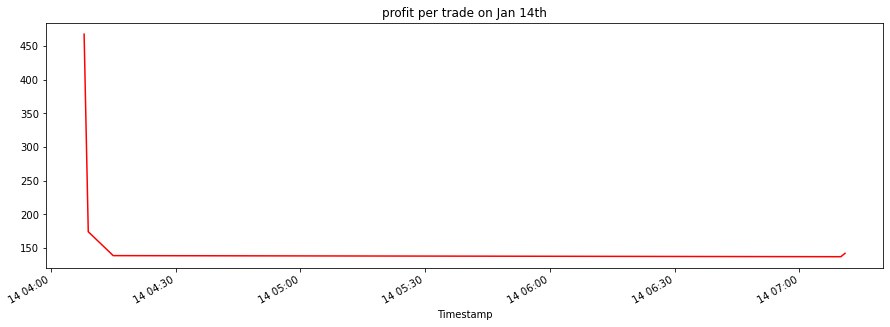

In [90]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(15, 5), title="profit per trade on Jan 14th", color="red")

<AxesSubplot:title={'center':'profit per trade on Feb 20th'}, ylabel='Frequency'>

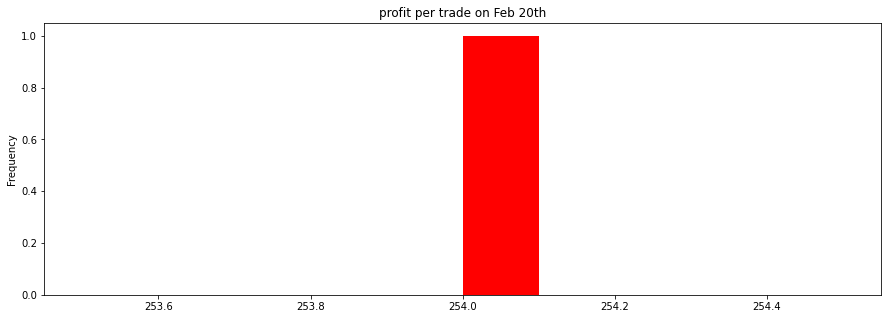

In [96]:
profit_per_trade_mid.plot(kind="hist",figsize=(15, 5), title="profit per trade on Feb 20th", color="red")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [97]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_mid = profit_per_trade_mid.sum()

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [99]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

In [100]:
cumulative_profit_mid = profit_per_trade_mid.cumsum()

<AxesSubplot:title={'center':'Cumulative profit per trade on Jan 14th'}, xlabel='Timestamp'>

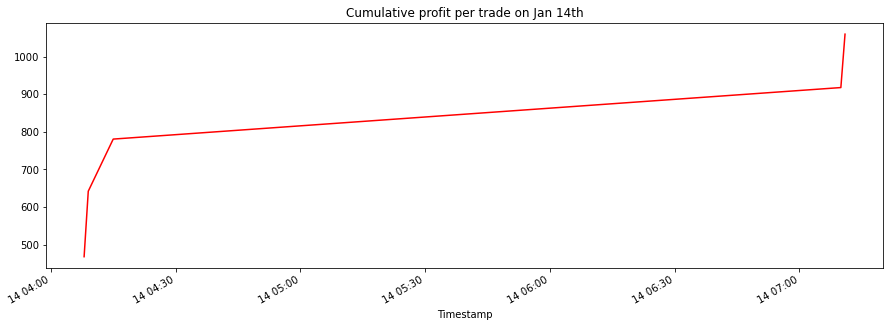

In [102]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(15, 5), title="Cumulative profit per trade on Jan 14th", color="red")

<AxesSubplot:title={'center':'Cumulative profit per trade on Feb 20th'}, ylabel='Frequency'>

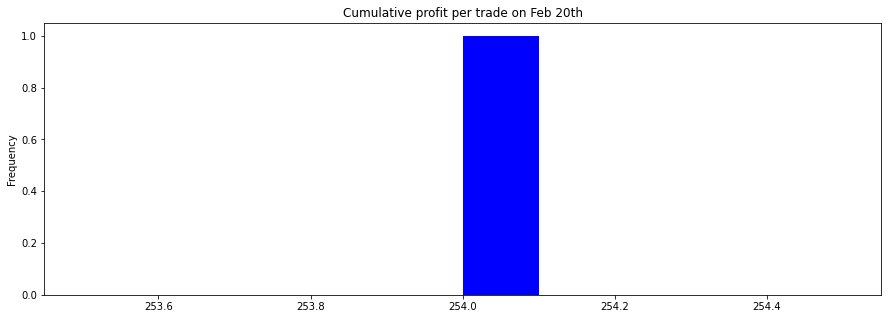

In [104]:
cumulative_profit_mid.plot(kind= "hist",figsize=(15, 5), title="Cumulative profit per trade on Feb 20th", color="blue")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The closing prices on bitstamp aree lowre than coinbase in Jan, then the trend moves towards closing prices almost being the same with spikes of bitstamp closing prices higher than coinbase.  Note, for the date picked in the March, the spread_return was not higher 0.01 so not much Opportunity for arbitrage was considered . 
Jan 14th had max profit per trade of $468
count      5.000000
mean     211.948000
std      143.946166
min      137.000000
25%      138.590000
50%      142.010000
75%      174.140000
max      468.000000